In [62]:
from data_processor import DataProcessor

In [63]:
train = DataProcessor('../config.yml')('RAW_TRAIN_FILE_NAME')
val = DataProcessor('../config.yml')('RAW_VAL_FILE_NAME')
test = DataProcessor('../config.yml')('RAW_TEST_FILE_NAME')

2025-05-27 21:50:04,758 - data_processor - INFO - Deleting stops...
2025-05-27 21:50:04,768 - data_processor - INFO - Stops deleted...
2025-05-27 21:50:04,768 - data_processor - INFO - Encoding labels...
2025-05-27 21:50:04,785 - data_processor - INFO - Labels encoded...
2025-05-27 21:50:29,187 - data_processor - INFO - Embedding text...
2025-05-27 21:51:31,329 - data_processor - INFO - Converting embeddings to dataframe...
2025-05-27 21:51:31,361 - data_processor - INFO - Concatenating embeddings with original dataframe...
2025-05-27 21:51:31,621 - data_processor - INFO - Text embedded...
2025-05-27 21:51:31,651 - data_processor - INFO - Renaming columns to lowercase...
2025-05-27 21:51:31,718 - data_processor - INFO - Columns renamed...
2025-05-27 21:51:31,915 - data_processor - INFO - Deleting stops...
2025-05-27 21:51:31,937 - data_processor - INFO - Stops deleted...
2025-05-27 21:51:31,938 - data_processor - INFO - Encoding labels...
2025-05-27 21:51:31,988 - data_processor - INFO

In [65]:
train.iloc[:, 770:]

,trust,anticipation,surprise,fear,sadness,disgust,anger,positive,negative,neutral
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6388,1,1,1,1,1,1,1,1,1,1
6389,1,1,1,1,1,1,1,1,1,1
6390,1,1,1,1,1,1,1,1,1,1
6391,1,1,1,1,1,1,1,1,1,1


In [56]:
train.to_csv('../data/clean_data/train.csv', index=False)
val.to_csv('../data/clean_data/val.csv', index=False)    
test.to_csv('../data/clean_data/test.csv', index=False)

In [57]:
train.head()

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,trust,anticipation,surprise,fear,sadness,disgust,anger,positive,negative,neutral
0,0.625319,-0.344142,-0.336505,-0.795379,-1.198253,0.767163,0.131462,0.499302,-0.456944,1.081408,...,1,1,1,1,1,1,1,1,1,1
1,-0.076731,-0.189474,-0.241794,-1.031343,-0.410032,0.015206,-0.315487,-1.140840,0.240389,-0.044278,...,1,1,1,1,1,1,1,1,1,1
2,-0.549568,0.292970,-0.237811,-1.464507,-0.256398,-0.257640,0.129297,0.090897,0.498563,0.079539,...,1,1,1,1,1,1,1,1,1,1
3,-0.421062,-0.050713,-0.098899,-0.435932,0.217081,-0.789393,-0.019077,0.292721,-0.072796,0.310624,...,1,1,1,1,1,1,1,1,1,1
4,-0.578499,-0.247815,0.050328,-0.520087,-0.639798,0.165438,-0.473650,-0.533067,0.628907,-0.323319,...,1,1,1,1,1,1,1,1,1,1


In [58]:
train.shape

(6393, 780)

In [59]:
X_train = train.iloc[:, :768]
y_train = train.iloc[:, 770:]

X_val = val.iloc[:, :768]
y_val = val.iloc[:, 770:]

X_test = test.iloc[:, :768]
y_test = test.iloc[:, 770:]

In [60]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = Sequential([

    Dense(512, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3), 

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

   
    Dense(output_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

/Users/mchojna/Documents/Repozytoria/emotion-and-sentiment-recognition/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,242 (2.13 MB)

 Trainable params: 559,242 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - binary_accuracy: 0.9630 - loss: 0.0778 - val_binary_accuracy: 1.0000 - val_loss: 2.2717e-05
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - binary_accuracy: 1.0000 - loss: 4.8934e-05 - val_binary_accuracy: 1.0000 - val_loss: 2.0936e-05
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - binary_accuracy: 1.0000 - loss: 4.1889e-05 - val_binary_accuracy: 1.0000 - val_loss: 1.3094e-05
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - binary_accuracy: 1.0000 - loss: 1.6563e-05 - val_binary_accuracy: 1.0000 - val_loss: 8.8380e-06
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - binary_accuracy: 1.0000 - loss: 7.9593e-06 - val_binary_accuracy: 1.0000 - val_loss: 5.8356e-06
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - binary_accuracy: 1.0000 - loss: 4.2822e-06 - val_binary_accuracy: 1.0000 - val_loss: 4.1105e-06
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - binary_accuracy: 1.0000 - loss: 2.6630e-06 

KeyboardInterrupt: 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9997 - loss: 9.4556e-04

Loss na zbiorze testowym: 0.0005
Binary Accuracy na zbiorze testowym: 0.9998
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Metryki dla klasyfikacji wieloetykietowej ---
Subset Accuracy: 0.9992
F1-Score (Macro): 0.9999
F1-Score (Micro): 0.9999


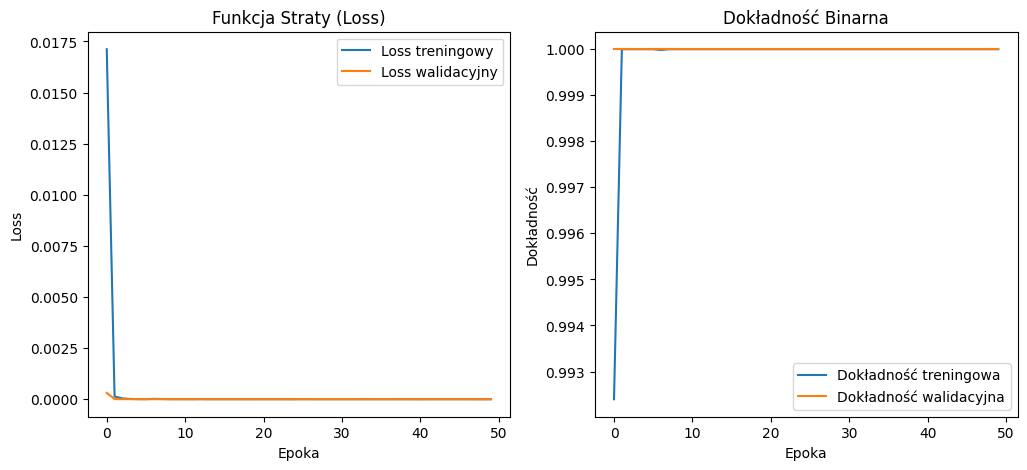

In [31]:
# Ocena modelu na zbiorze testowym
loss, binary_accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss na zbiorze testowym: {loss:.4f}")
print(f"Binary Accuracy na zbiorze testowym: {binary_accuracy:.4f}")

# Wykonanie predykcji
Y_pred_raw = model.predict(X_test)

# Y_pred_raw zawiera prawdopodobieństwa dla każdej emocji (od 0 do 1)
# Aby uzyskać binarne przewidywania (0 lub 1), musisz zastosować próg (np. 0.5)
threshold = 0.5
Y_pred_binary = (Y_pred_raw > threshold).astype(int)

# Ważne metryki dla klasyfikacji wieloetykietowej (poza Kerasem, z Scikit-learn)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print("\n--- Metryki dla klasyfikacji wieloetykietowej ---")

# Accuracy score (mniej intuicyjne dla multi-label, ale czasem podawane)
# To jest 'subset accuracy' - liczy, ile razy model poprawnie przewidział WSZYSTKIE etykiety dla próbki.
# Jeśli przewidzi choć jedną źle, próbka jest liczona jako błędna.
subset_accuracy = accuracy_score(y_test, Y_pred_binary)
print(f"Subset Accuracy: {subset_accuracy:.4f}")

# F1-score (często najlepsza metryka dla multi-label)
# macro: średnia arytmetyczna F1-score dla każdej klasy z osobna. Nie uwzględnia nierówności klas.
# micro: F1-score obliczone globalnie, sumując TP, FP, FN dla wszystkich klas. Uwzględnia nierówności klas.
# weighted: F1-score ważone liczbą wystąpień dla każdej klasy.

f1_macro = f1_score(y_test, Y_pred_binary, average='macro')
f1_micro = f1_score(y_test, Y_pred_binary, average='micro')
print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Micro): {f1_micro:.4f}")

# Raport klasyfikacji dla każdej etykiety
# Jeśli masz nazwy kolumn emocji, możesz je przekazać do target_names
# print("\nClassification Report (per label):")
# print(classification_report(Y_test, Y_pred_binary, target_names=emocje_nazwy_kolumn))

# Możesz również zwizualizować historię trenowania
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss treningowy')
plt.plot(history.history['val_loss'], label='Loss walidacyjny')
plt.title('Funkcja Straty (Loss)')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_binary_accuracy'], label='Dokładność walidacyjna')
plt.title('Dokładność Binarna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

In [37]:
y_train.shape[1]

10

In [42]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import tensorflow as tf
import keras


model_name = 'sdadas/st-polish-paraphrase-from-distilroberta'
sbert_model = SentenceTransformer(model_name)

emocje_nazwy_kolumn = ['joy', 'trust', 'anticipation', 'surprise', 'fear', 'sadness', 'disgust', 'anger', 'positive', 'negative', 'neutral']

input_dim_keras = sbert_model.get_sentence_embedding_dimension() # Pobierz wymiar embeddingu z modelu SBERT
output_dim_keras = len(emocje_nazwy_kolumn) # Liczba emocji


keras_model = model
# try:
#     # Spróbuj wczytać model, jeśli został wcześniej zapisany
#     keras_model = keras.models.load_model('emotions_classifier_model.h5')
#     print("Załadowano model Keras z 'emotions_classifier_model.h5'")
# except Exception:
#     # Jeśli nie ma zapisanego modelu, stwórz prosty jako placeholder (NIE TRENUJ TEGO W PRODUKCJI)
#     print("Nie znaleziono zapisanego modelu. Tworzę prosty model Keras do celów demonstracyjnych. Należy go wytrenować!")
#     keras_model = keras.models.Sequential([
#         keras.layers.Dense(128, activation='relu', input_shape=(input_dim_keras,)),
#         keras.layers.Dense(output_dim_keras, activation='sigmoid')
#     ])
#     keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])


In [47]:
def predict_emotions(sentence: str, sbert_model: SentenceTransformer, keras_model: tf.keras.Model, emotion_names: list, threshold: float = 0.5):
    """
    Przetwarza pojedyncze zdanie, generuje embedding, wykonuje predykcję emocji
    i wyświetla prawdopodobieństwa oraz binarne etykiety, bez użycia DataFrame.

    Args:
        sentence (str): Zdanie do analizy.
        sbert_model (SentenceTransformer): Wczytany model sentence-transformers.
        keras_model (tf.keras.Model): Wytrenowany model Keras do klasyfikacji emocji.
        emotion_names (list): Lista nazw emocji w kolejności odpowiadającej wyjściu modelu.
        threshold (float): Próg do binarnej klasyfikacji (domyślnie 0.5).
    """
    if not sentence.strip():
        print("Wprowadzono puste zdanie.")
        return

    processed_sentence = sentence.strip()
    embedding = sbert_model.encode([processed_sentence])
    predictions = keras_model.predict(embedding, verbose=0)[0]

    print(f"\nAnaliza zdania: '{sentence}'")
    print("-" * (len(sentence) + 12))

    # Przygotowanie danych do sortowania i formatowania
    # Tworzymy listę krotek: (prawdopodobieństwo, nazwa_emocji, obecna_binarna)
    results_list = []
    for i, prob in enumerate(predictions):
        emotion = emotion_names[i]
        is_present = int(prob > threshold)
        results_list.append((prob, emotion, is_present))

    # Sortowanie wyników malejąco według prawdopodobieństwa
    results_list.sort(key=lambda x: x[0], reverse=True)

    # Określenie szerokości kolumn dla ładnego formatowania
    max_emotion_len = max(len(e) for e in emotion_names)
    header_format = f"{{:<{max_emotion_len}}}  {{:>15}}  {{:>12}}"
    row_format = f"{{:<{max_emotion_len}}}  {{:>15.4f}}  {{:>12}}"

    print(header_format.format("Emocja", "Prawdopodobieństwo", "Obecna (0/1)"))
    print("-" * (max_emotion_len + 30)) # Linia separatora

    for prob, emotion, is_present in results_list:
        print(row_format.format(emotion, prob, is_present))


In [48]:
predict_emotions("Czuję się dzisiaj bardzo szczęśliwy i pełen nadziei na przyszłość.", sbert_model, keras_model, emocje_nazwy_kolumn)


Analiza zdania: 'Czuję się dzisiaj bardzo szczęśliwy i pełen nadziei na przyszłość.'
------------------------------------------------------------------------------
Emocja        Prawdopodobieństwo  Obecna (0/1)
------------------------------------------
joy                    1.0000             1
trust                  1.0000             1
anticipation           1.0000             1
surprise               1.0000             1
fear                   1.0000             1
sadness                1.0000             1
disgust                1.0000             1
anger                  1.0000             1
positive               1.0000             1
negative               1.0000             1


In [ ]:
predict_emotions("To była okropna wiadomość, jestem załamany i zły.", sbert_model, keras_model, emocje_nazwy_kolumn)

predict_emotions("Widzę, że coś się dzieje, ale nie jestem pewien co.", sbert_model, keras_model, emocje_nazwy_kolumn)

predict_emotions("Ostrzegam, to może być bardzo niebezpieczne!", sbert_model, keras_model, emocje_nazwy_kolumn)

predict_emotions("To jest neutralne stwierdzenie, nie ma w nim emocji.", sbert_model, keras_model, emocje_nazwy_kolumn)